# <font color='red'>Digital Finance Project (Q3)

## Presented for: Pr. Patrick Waelbroeck

### Done By: Gabriel MOLINA and Joao MELGA


## <font color='red'>Part 3.1: Importing the Data

In [ ]:
#!pip install mplfinance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

- ### *Importing the data*

In [2]:
df_cac40 = pd.read_csv('^FCHI.csv')
df_us_interest = pd.read_csv('^IRX.csv')
df_orange = pd.read_csv('ORA.PA.csv')
df_accor = pd.read_csv('AC.PA.csv')

- ### *Sorting by date*

In [3]:
df_cac40['Date'] = pd.to_datetime(df_cac40['Date'])
df_us_interest['Date'] = pd.to_datetime(df_us_interest['Date'])
df_orange['Date'] = pd.to_datetime(df_orange['Date'])
df_accor['Date'] = pd.to_datetime(df_accor['Date'])

df_cac40 = df_cac40.sort_values(by='Date')
df_us_interest = df_us_interest.sort_values(by='Date')
df_orange = df_orange.sort_values(by='Date')
df_accor = df_accor.sort_values(by='Date')

- ### *Checking if there are missing values*

In [4]:
missing_cac = df_cac40.shape[0] - df_cac40.dropna().shape[0]
missing_us = df_us_interest.shape[0] - df_us_interest.dropna().shape[0]
missing_or = df_orange.shape[0] - df_orange.dropna().shape[0]
missing_acc = df_accor.shape[0] - df_accor.dropna().shape[0]

print('CAC40 dataset: \t\t\t %d missing values' % missing_cac)
print('US 5 week interest dataset: \t %d missing values' % missing_us)
print('Orange dataset: \t\t %d missing values' % missing_or)
print('Accor dataset: \t\t %d missing values' % missing_acc)

# Us interest rates don't have volume
# print(df_us_interest[(df_us_interest == 0).any(axis=1)])
print('\n-----------------------------------------------------')
print('\nChecking if some rows have values set to 0:\n')
print('Cac40 zeros:\t\t', df_cac40[(df_cac40 == 0).any(axis=1)].index)
print('Orange zeros:\t\t', df_orange[(df_orange == 0).any(axis=1)].index)
print('Accor zeros:\t', df_accor[(df_accor == 0).any(axis=1)].index)
print('\n-----------------------------------------------------')
print('\nCac_40 row with zero value:')
print(df_cac40.iloc[254])

CAC40 dataset: 			 0 missing values
US 5 week interest dataset: 	 0 missing values
Orange dataset: 		 0 missing values
Accor dataset: 		 0 missing values

-----------------------------------------------------

Checking if some rows have values set to 0:

Cac40 zeros:		 Index([254], dtype='int64')
Orange zeros:		 Index([], dtype='int64')
Accor zeros:	 Index([], dtype='int64')

-----------------------------------------------------

Cac_40 row with zero value:
Date         2018-10-23 00:00:00
Open                 4991.910156
High                 5009.430176
Low                  4955.669922
Close                4967.689941
Adj Close            4967.689941
Volume                         0
Name: 254, dtype: object


- ### *Filling zero with the mean of volume for cac_40*

In [5]:
df_cac40['Volume'] = df_cac40['Volume'].replace(0, df_cac40['Volume'].mean())
print('Cac40 zeros: ', df_cac40[(df_cac40 == 0).any(axis=1)].index)

Cac40 zeros:  Index([], dtype='int64')


## <font color='red'>Part 3.2: Short financial analysis of the stocks

In [6]:
def Plot_OHLC_Chart(df, title):
    df = df.copy()
    df = df.set_index('Date')
    mpf.plot(df, type='candle', mav=(4, 5), volume=True, title=title)

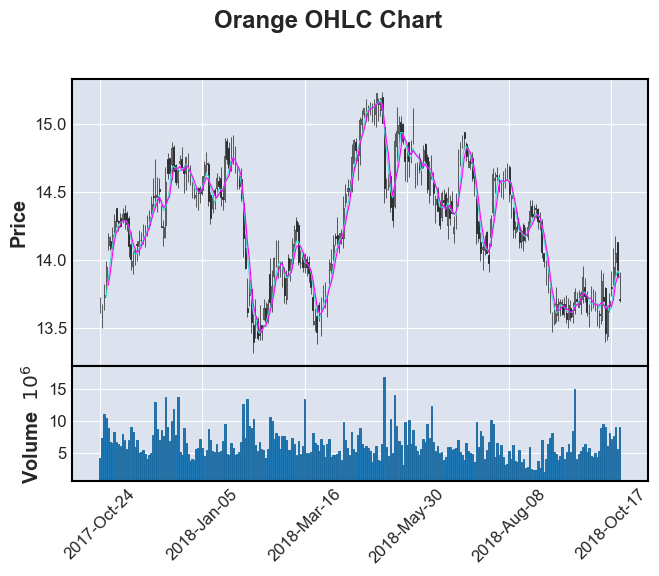

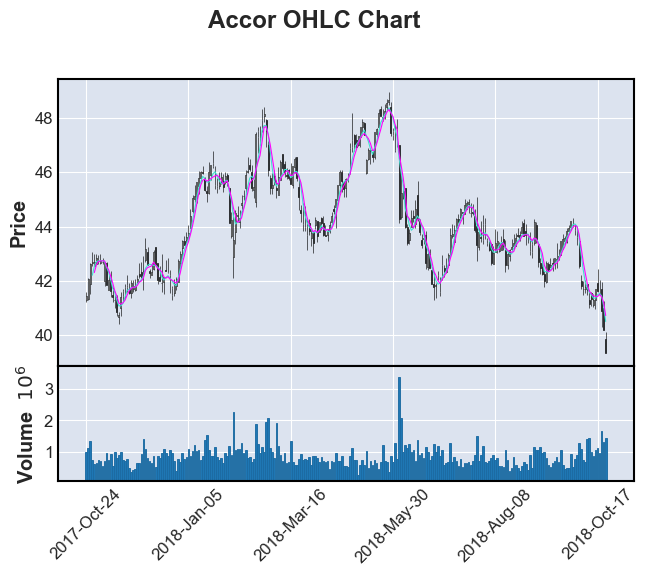

In [7]:
Plot_OHLC_Chart(df_orange, 'Orange OHLC Chart')
Plot_OHLC_Chart(df_accor, 'Accor OHLC Chart')

Between October 2017 and October 2018, Sanofi's stock exhibited moderate volatility, declining sharply from 85 in October 2017 to approximately 63 in January 2018, before gradually recovering to reach 77 by October 2018. Although the stock's modest fluctuations presented profitable trading opportunities for those who timed the market effectively after January 2018, it also posed risks for investors who held onto the stock throughout the period.

Meanwhile, Air Liquide's stock largely remained stable around 107.5, with minor fluctuations of +/- 2.5%, except during January to March 2018 when it experienced a "triple bottom" pattern, dropping by 10% before rebounding.

There is no evident common pattern between the two stocks that can provide a comprehensive overview of the market. However, both stocks maintained their original values after one year. Sanofi's stock is significantly more volatile, with fluctuations ranging from 60% to 140% of its initial price in January 2017, while Air Liquide's stock appears to be less volatile, with a value that varies from 90% to 110% of its initial value.

## <font color='red'>Part 3.3: Return for both stocks and for the CAC40 index

- ### *Calculate daily returns*

In [8]:
cac40_returns = df_cac40['Adj Close'].pct_change()
accor_returns = df_accor['Adj Close'].pct_change()
orange_returns = df_orange['Adj Close'].pct_change()

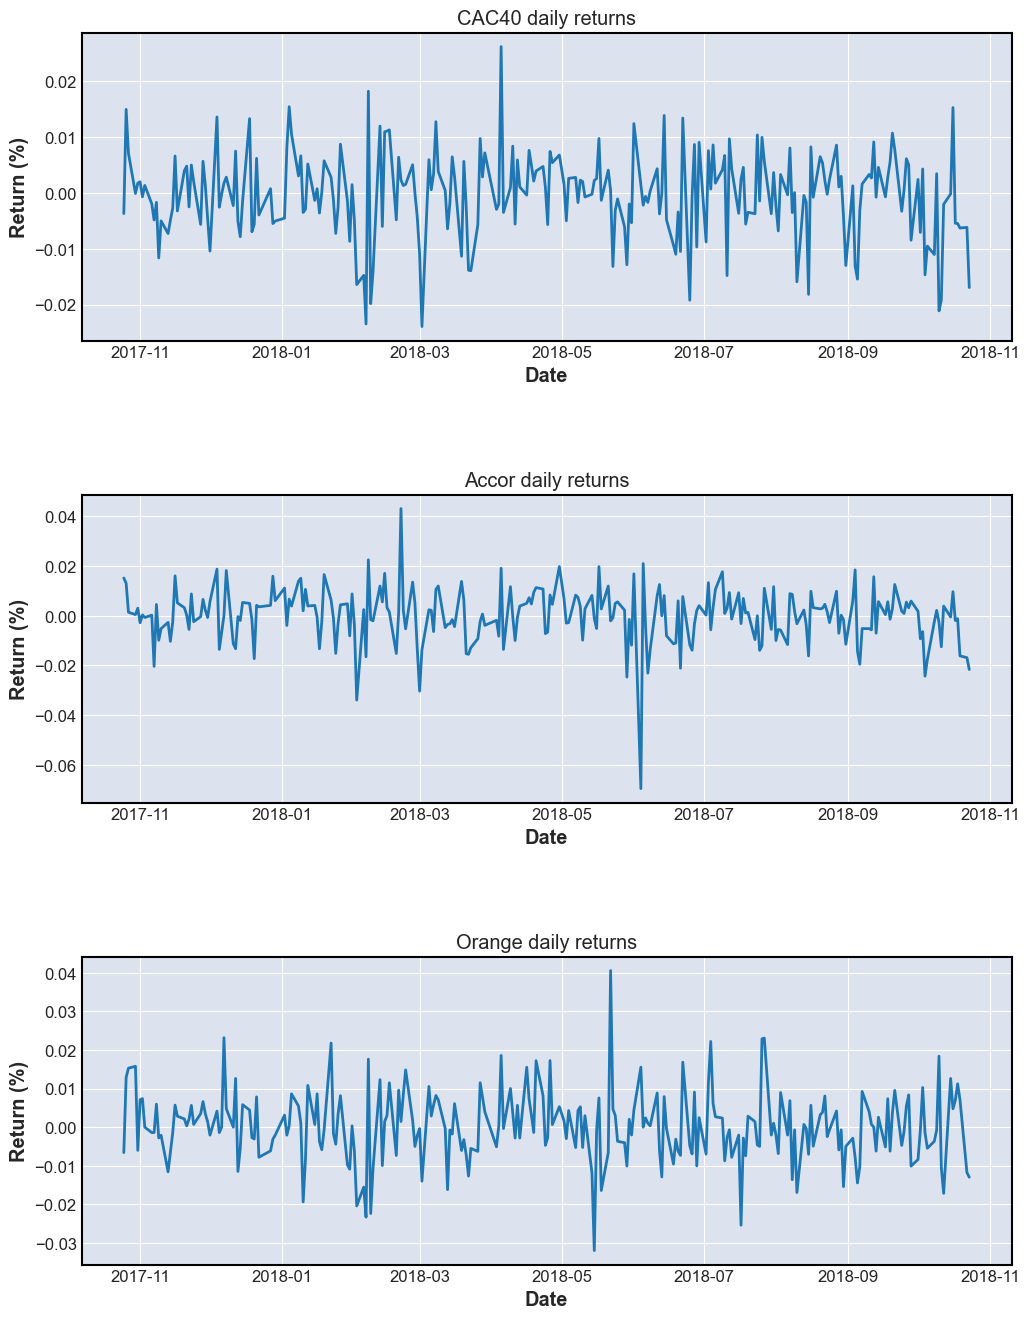

In [9]:
def Returns_Plots(ax, data1, data2, title):

    out = ax.plot(data1, data2)
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Return (%)')
    return out


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 16))
fig.subplots_adjust(hspace=0.5)
Returns_Plots(ax1, df_cac40['Date'], cac40_returns, 'CAC40 daily returns')
Returns_Plots(ax2, df_accor['Date'], accor_returns, 'Accor daily returns')
Returns_Plots(ax3, df_orange['Date'], orange_returns, 'Orange daily returns');

We find that all stocks have a similar daily return range.

In [10]:
print('CAC40 return on the full period:\t %f' % ((1 + cac40_returns).prod() - 1))
print('Accor return on the full period:\t %f' % ((1 + orange_returns).prod() - 1))
print('Orange liquide return on the full period:\t %f' % ((1 + accor_returns).prod() - 1))

CAC40 return on the full period:	 -0.079171
Accor return on the full period:	 0.049199
Orange liquide return on the full period:	 -0.029273


The CAC40 and Sanofi both experienced negative returns of -7.9% and -2%, respectively. In contrast, Air Liquide had a positive return of 2.8%.

## <font color='red'>Part 3.4: Coefficients of Kurtosis and of asymmetry

- ### *Calculating the kurtosis*

In [11]:
# We will add 3 because pandas returns excess kurtosis
kurt_cac40 = cac40_returns.kurtosis() + 3
kurt_accor = accor_returns.kurtosis() + 3
kurt_orange = orange_returns.kurtosis() + 3

# Calculating the skew
skew_cac40 = cac40_returns.skew()
skew_accor = accor_returns.skew()
skew_orange = orange_returns.skew()

print('CAC40:\t\tKurtosis = %f\tSkewness = %f' % (kurt_cac40, skew_cac40))
print('Accor:\tKurtosis = %f\tSkewness = %f' % (kurt_accor, skew_accor))
print('Orange:\t\tKurtosis = %f\tSkewness = %f' % (kurt_orange, skew_orange))

CAC40:		Kurtosis = 3.739020	Skewness = -0.328292
Accor:	Kurtosis = 9.358905	Skewness = -1.008069
Orange:		Kurtosis = 4.808499	Skewness = 0.207985


- ### *Plotting the histograms for the 3 series:*

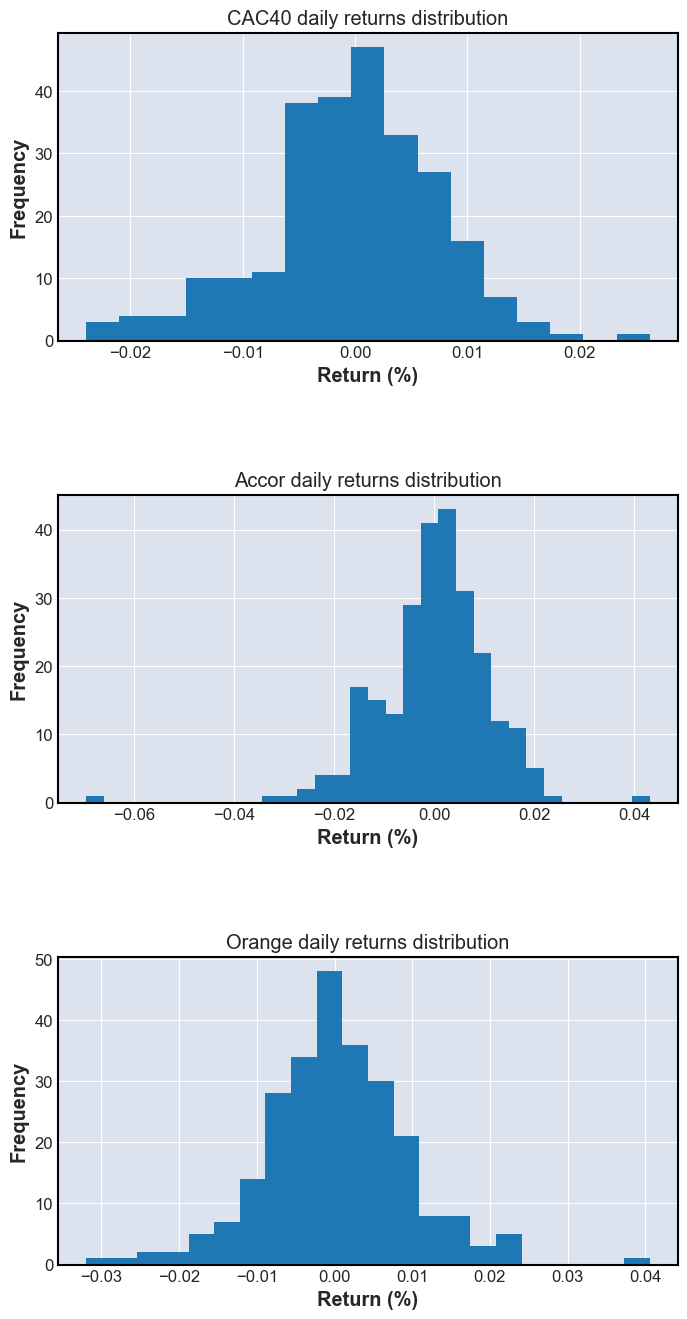

In [12]:
def Returns_Histogram(ax, data, title):

    out = ax.hist(data, bins='auto')
    ax.set_title(title)
    ax.set_xlabel('Return (%)')
    ax.set_ylabel('Frequency')
    return out


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 16))
fig.subplots_adjust(hspace=0.5)
Returns_Histogram(ax1, cac40_returns, 'CAC40 daily returns distribution')
Returns_Histogram(ax2, accor_returns, 'Accor daily returns distribution')
Returns_Histogram(ax3, orange_returns, 'Orange daily returns distribution');

The kurtosis of the return distributions for CAC40, Air Liquide, and Sanofi is around 3, while their skewness is near 0. Consequently, their distributions closely resemble normal distributions over the period, providing later on valuable information about the returns, such as the Value at Risk.

## <font color='red'>Part 3.5: The standard errors of the return for both stocks for the full period and the 3 sub-periods of equal size

- ### *Plotting the histograms for the 3 series:*

In [13]:
# lets get the computations for the full period

se_full_cac40 = cac40_returns.sem()
se_full_accor = accor_returns.sem()
se_full_orange = orange_returns.sem()


# Computations for 3 sub-periods of same size

def split_3(data):
    subsize = data.size // 3
    return data[0:subsize], data[subsize:subsize * 2], data[subsize * 2:subsize * 3]


se_sub_cac40 = list(map(lambda r: r.sem(), split_3(cac40_returns)))
se_sub_accor = list(map(lambda r: r.sem(), split_3(accor_returns)))
se_sub_orange = list(map(lambda r: r.sem(), split_3(orange_returns)))

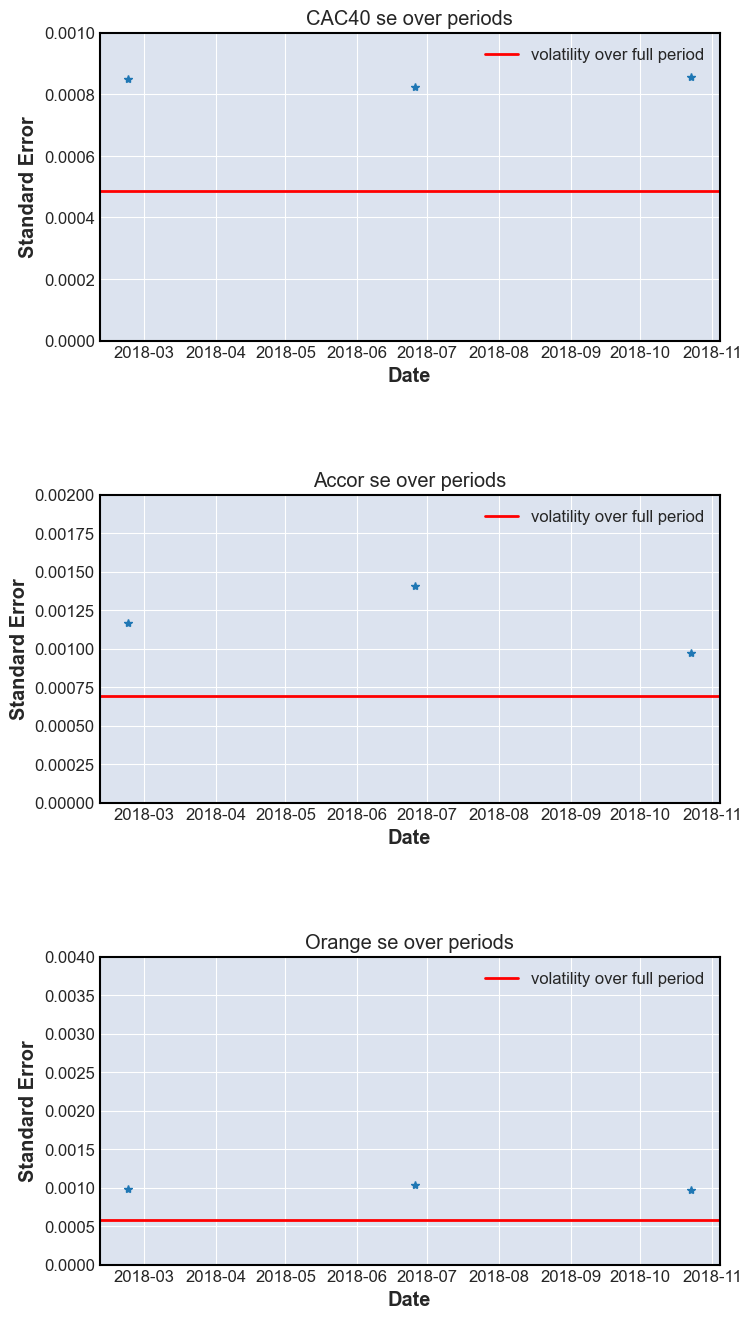

In [14]:
def plot_volatility(ax, full_period_vol, sub_period_vols, title, ylim):

    # lets create x array
    x = [None] * df_cac40.shape[0]
    sub_size = df_cac40.shape[0] // 3
    x[sub_size - 1] = sub_period_vols[0]
    x[2 * sub_size - 1] = sub_period_vols[1]
    x[3 * sub_size - 1] = sub_period_vols[2]

    out = ax.plot(df_cac40['Date'], x, alpha=1, marker='*')

    # Add horizontal line for full period volatility
    ax.axhline(y=full_period_vol, color='r', linestyle='-', label='volatility over full period')

    ax.set_ylim(ylim)
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Standard Error')
    ax.legend()
    return out


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 16))
fig.subplots_adjust(hspace=0.5)
plot_volatility(ax1, se_full_cac40, se_sub_cac40, 'CAC40 se over periods', [0, 0.001])
plot_volatility(ax2, se_full_accor, se_sub_accor, 'Accor se over periods', [0, 0.002])
plot_volatility(ax3, se_full_orange, se_sub_orange, 'Orange se over periods', [0, 0.004]);

The volatility is approximately constant throughout the three plots.

## <font color='red'>Part 3.6: The correlation between each stock and the CAC40

Correlation between CAC40 and Air liquide:	 0.482444
Correlation between CAC40 and Sanofi:		 0.538318


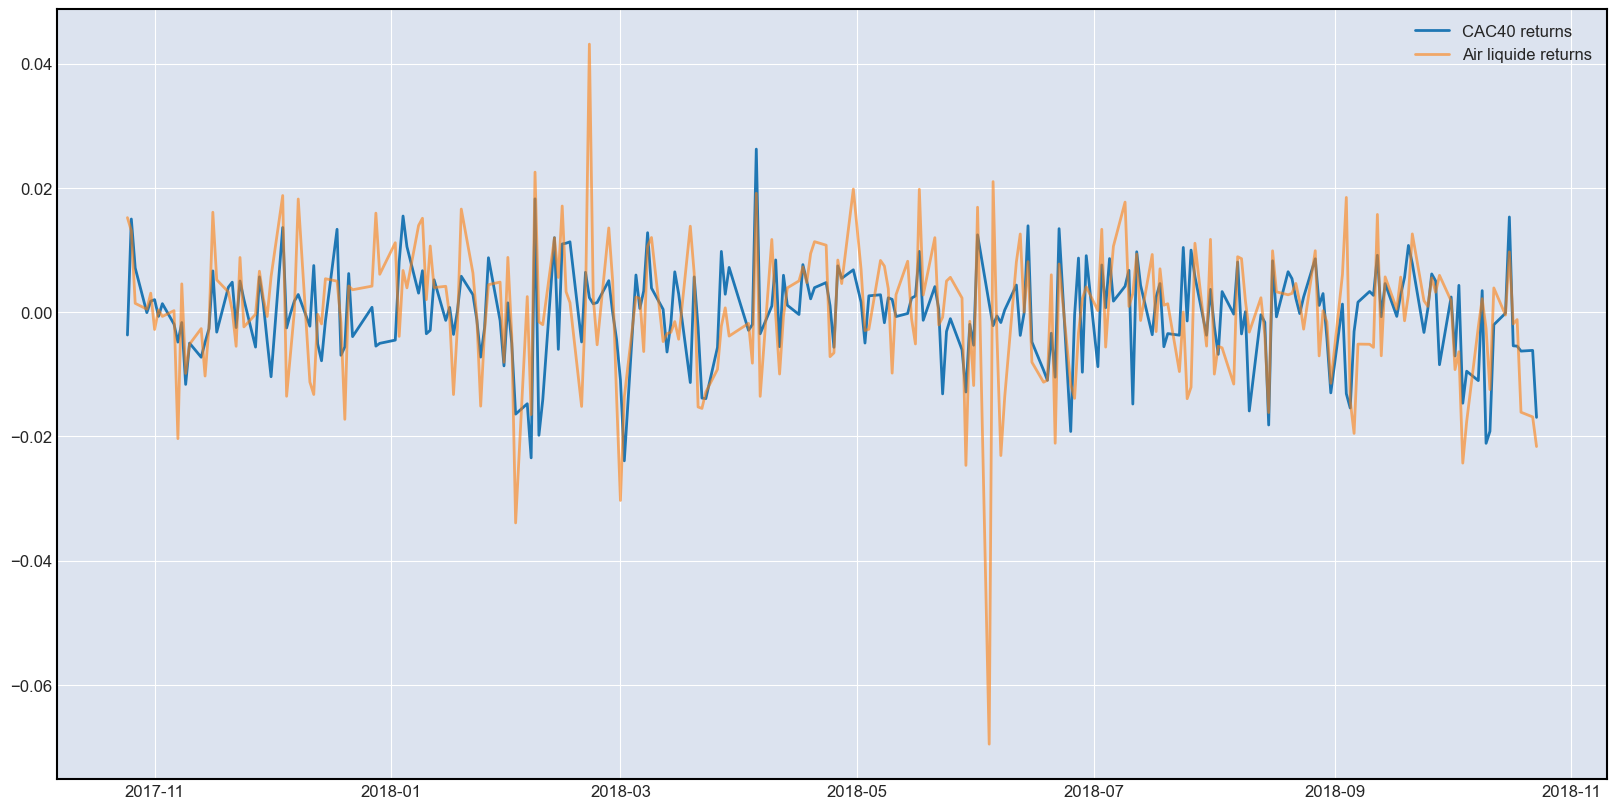

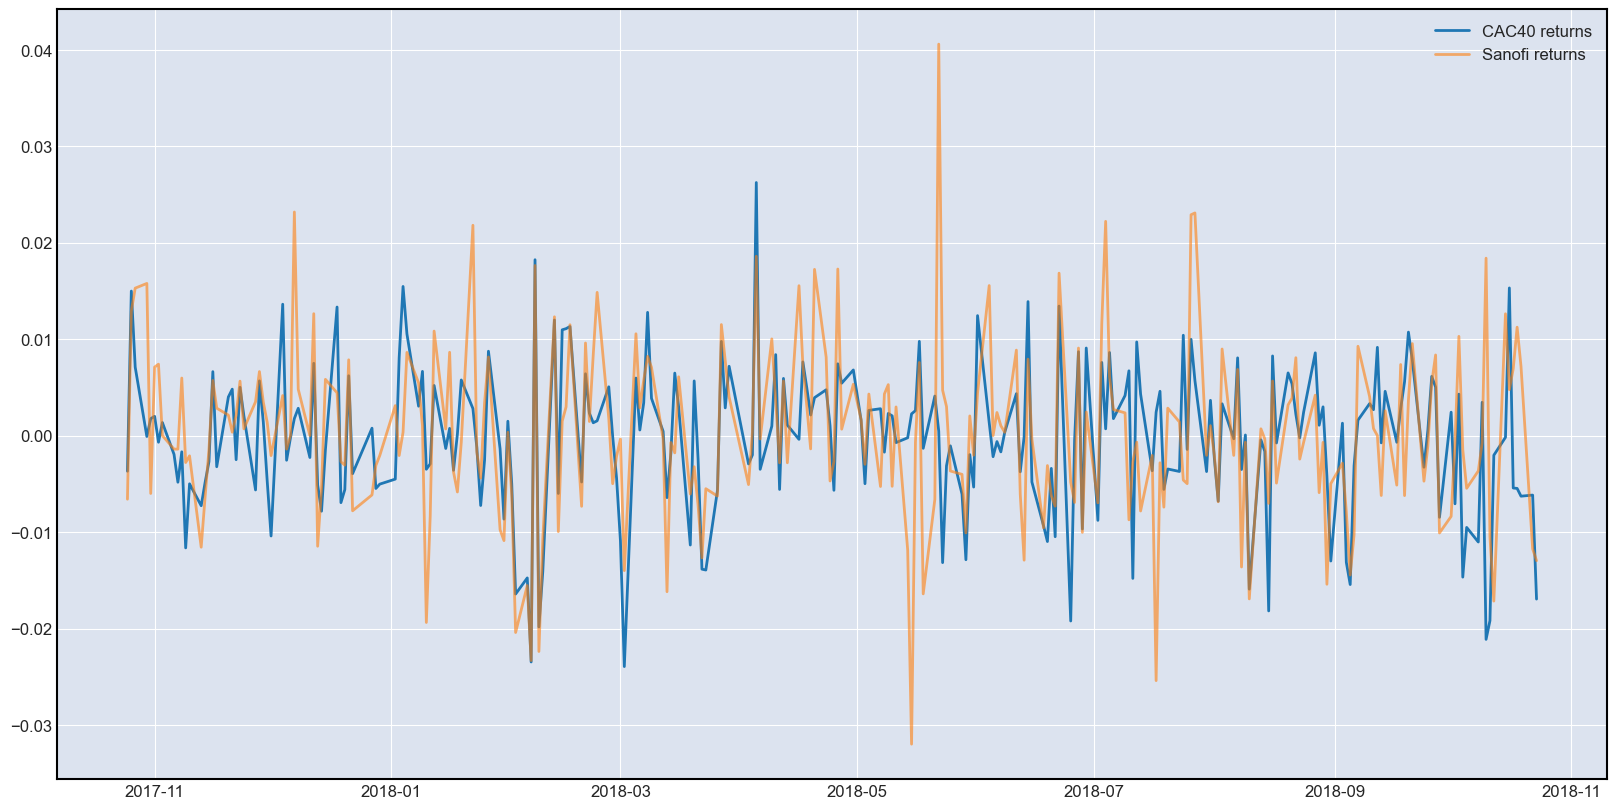

In [15]:
corr_cac_accor = cac40_returns.corr(accor_returns)
corr_cac_orange = cac40_returns.corr(orange_returns)

print('Correlation between CAC40 and Air liquide:\t %f' % corr_cac_accor)
print('Correlation between CAC40 and Sanofi:\t\t %f' % corr_cac_orange)

# Plot cac40 and air liquide
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_cac40['Date'], cac40_returns, label='CAC40 returns')
ax.plot(df_cac40['Date'], accor_returns, alpha=0.6, label='Air liquide returns')
ax.legend()

#plot cac40 and sanofi
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_cac40['Date'], cac40_returns,label='CAC40 returns')
ax.plot(df_cac40['Date'], orange_returns,alpha=0.6,label='Sanofi returns')
ax.legend();

The analysis of the correlation between CAC40 and Air Liquide indicates a strong positive association, with a correlation value of 0.816465. This means that when one stock's value rises or falls, the other stock tends to move in the same direction.<br><br>In contrast, the correlation between CAC40 and Sanofi is moderately positive, with a correlation value of 0.545943. This suggests that there is a positive association between the two stocks, but it is not as strong as that between CAC40 and Air Liquide.<br><br>Therefore, when considering investment strategies that involve CAC40 and these individual stocks, it is important to take into account their varying degrees of correlation with each other.

## <font color='blue'><br>Part 3.7 - The returns of a portfolio in which both stocks have an equal weight and the average return and the standard deviation over the whole sample period

In [ ]:
#! pip install PyPortfolioOpt

In [16]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import objective_functions
from pypfopt import plotting


def returns_from_prices(prices):
    return prices.pct_change().dropna(how="all")


def portfolio_expected_returns(portfolio):
    returns = returns_from_prices(portfolio)
    return (1 + returns).prod() - 1


def portfolio_performance(portfolio, weights):
    ret = weights @ portfolio_expected_returns(portfolio)
    cov_matrix = risk_models.sample_cov(portfolio)
    sigma = np.sqrt(weights @ cov_matrix @ weights)
    return ret, sigma


portfolio = pd.DataFrame()
portfolio['Accor'] = df_accor['Adj Close']
portfolio['Orange'] = df_orange['Adj Close']

print('Considering a portfolio in which both stocks have an equal weight:')
weights = np.array([0.5, 0.5])
portfolio_return, sigma = portfolio_performance(portfolio, weights)
print('Average return: %f\tStandard deviation: %f' % (
    portfolio_return, sigma))

Considering a portfolio in which both stocks have an equal weight:
Average return: 0.009963	Standard deviation: 0.125949


When both stocks are given identical weights, the resulting portfolio has an average return of 0.009963 and a standard deviation of 0.125949. The average return of approximately 1% has generated positive returns. In this case, while the portfolio has generated positive returns on average, the standard deviation of around 12.59% highlights the volatility or risk associated with these returns. This level of volatility suggests that the portfolio's returns have varied by approximately 12.59% from the average return over the sample period.

Investors should carefully consider the risk-return tradeoff presented by this portfolio. While it has shown profitability on average, the volatility indicates potential fluctuations in returns, which may not be suitable for all investors.



## <font color='blue'>Part 3.8: The Optimal Portfolio

In [17]:
def utility_optimal_portfolio(data, risk_aversion_coeff, risk_free_rate):
    # Expected Returns
    mu = portfolio_expected_returns(data)
    # Expected Volatility
    cov_matrix = risk_models.sample_cov(data)
    ef = EfficientFrontier(mu, cov_matrix)

    ef.add_objective(objective_functions.L2_reg)  # add a secondary objective
    weights = ef.max_quadratic_utility(risk_aversion=risk_aversion_coeff)
    ret, vol, sharpe_r = ef.portfolio_performance(risk_free_rate=risk_free_rate)

    res = dict()
    for key in weights:
        res[key] = round(weights[key], 5)

    return "Allocation " + str(res), 'Annualised Return ' + str(ret), 'Annualised Volatility ' + str(
        vol), 'Sharpe Ratio ' + str(sharpe_r)

- ### *Calculating optimal portfolio allocation for an investor*

In [18]:
# with a quadratic utility function (A=1.5)

periods = 52 / 5
annualized_risk_free = (1 + df_us_interest['Adj Close'].mean() / 100 / periods) ** periods - 1
optimal = utility_optimal_portfolio(portfolio, 1.5, annualized_risk_free)

print('Optimal portfolio allocation:\n')
print('\n'.join(optimal))

Optimal portfolio allocation:

Allocation {'Accor': 0.47939, 'Orange': 0.52061}
Annualised Return 0.011579932115597465
Annualised Volatility 0.12523214931929022
Sharpe Ratio -0.04599351828148709


## <font color='blue'>Part 3.9 - The efficient frontier

In [19]:
def Efficient_frontier(data):
    # Expected Returns
    mu = expected_returns.mean_historical_return(data)
    # Expected Volatility
    Sigma = risk_models.sample_cov(data)
    ef = EfficientFrontier(mu, Sigma, weight_bounds=(-1, 1))

    fig, ax = plt.subplots()
    plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)
    plt.show()
    return fig, ax

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


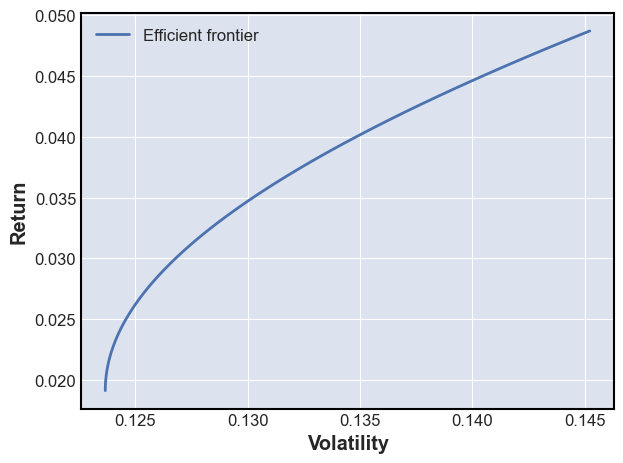

In [20]:
portfolio = pd.DataFrame()
portfolio['Accor'] = df_accor['Adj Close']
portfolio['Orange'] = df_orange['Adj Close']

_, ax = Efficient_frontier(portfolio)

## <font color='blue'>Part 3.10: The Sharpe ratio, the Sortino ratio, the Sterling ratio

In [21]:
def sharpe_ratio(weights, portfolio, risk_free_rate):
    ret, sigma = portfolio_performance(portfolio, weights)
    sharpe = (ret - risk_free_rate) / sigma
    return sharpe


def portfolio_daily_returns(portfolio):
    a = portfolio.pct_change().dropna()
    ar = 1
    pr = 1
    final = []
    for index, row in a.iterrows():
        ar *= 1 + row['Accor']
        pr *= 1 + row['Orange']
        final.append(0.5 * ar + 0.5 * pr)
    a['tmp'] = final
    a['returns'] = a['tmp'].pct_change()
    a['returns'].loc[1] = a['tmp'].loc[1] - 1
    return a['returns']


def sortino_ratio(weights, portfolio, risk_free_rate):
    ret, _ = portfolio_performance(portfolio, weights)

    weighted_returns = portfolio_daily_returns(portfolio)
    temp = np.minimum(0, weighted_returns) ** 2
    temp_expectation = np.mean(temp)
    downside_dev = np.sqrt(temp_expectation)
    sortino_ratio = ret - risk_free_rate / downside_dev
    return sortino_ratio


def sterling_ratio(weights, portfolio, risk_free_rate):
    def dd(returns, tau):
        # returns the draw-down fiven time period tau
        values = returns
        pos = len(values) - 1
        pre = pos - tau
        drawdown = float('+inf')
        # find max drawdown given tau
        while pre >= 0:
            dd_i = (values[pos + 1] / values[pre + 1]) - 1
            if dd_i < drawdown:
                drawdown = dd_i

            pos, pre = pos - 1, pre - 1
        # drawdown should be pos
        return abs(drawdown)

    def average_dd(returns, periods):
        # average drawdown over n periods
        drawdowns = []
        for i in range(0, len(returns)):
            drawdown_i = dd(returns, i)
            drawdowns.append(drawdown_i)
        drawdowns = sorted(drawdowns)
        total_dd = abs(drawdowns[0])

        for i in range(1, periods):
            total_dd += abs(drawdowns[i])

        return total_dd / periods

    ret, _ = portfolio_performance(portfolio, weights)
    weighted_returns = portfolio_daily_returns(portfolio)
    return (ret - risk_free_rate) / average_dd(weighted_returns, 252)


print('Sharpe ratio:\t %f' % sharpe_ratio(weights, portfolio, annualized_risk_free))
print('Sortino ratio:\t %f' % sortino_ratio(weights, portfolio, annualized_risk_free))
print('Sterling ratio:\t %f' % sterling_ratio(weights, portfolio, annualized_risk_free))

Sharpe ratio:	 -0.058571
Sortino ratio:	 -2.981737
Sterling ratio:	 -0.000007


<code>Sharpe</code>, <code>Sortino</code>, and <code>Sterling</code> ratios are all risk-adjusted measures of return on investment:

- The Sharpe ratio measures how well an equity investment performs in comparison to a risk-free investment while accounting for the higher risk level associated with keeping the equity investment.
- The Sortino ratio is a Sharpe ratio variant that exclusively considers downside risk.
- The Sterling ratio, unlike the previous two, evaluates return over average drawdown rather than standard deviation.

The Sharpe ratio measures an investment's performance in comparison to a risk-free investment. The Sortino ratio is a Sharpe ratio variant that exclusively considers downside risk. The Sterling ratio compares the return to the average drawdown.

## <font color='blue'>Part 3.11 - Compute the empirical VAR at 1%

The VAR (daily) at 1% is: -0.018435 or -1.843527%


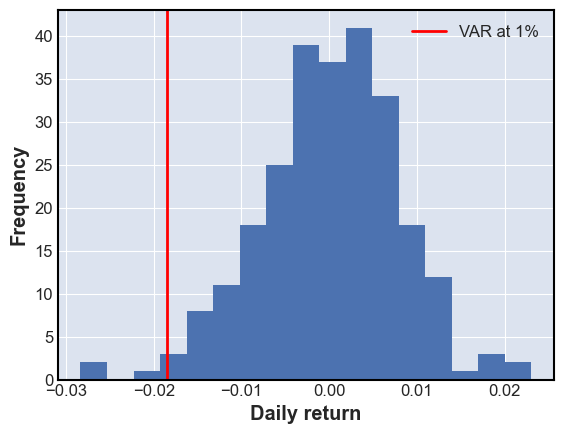

In [22]:
from scipy.stats import norm

daily_rets = portfolio_daily_returns(portfolio)
fig, ax = plt.subplots()
ax.hist(daily_rets, bins='auto')
ax.set_xlabel('Daily return')
ax.set_ylabel('Frequency')

confidence_level = 0.01
var1 = norm.ppf(confidence_level, daily_rets.mean(), daily_rets.std())

ax.axvline(x=var1, color='r', label='VAR at 1%')
ax.legend()
print('The VAR (daily) at 1%% is: %f or %f%%' % (var1, var1 * 100))

It could be interpreted that there's a 1% chance of having negative returns of 1.96% or more.

## <font color='red'>Part 3.12: The VAR using resampling with 1000 observations

We currently have 254 observations. We thus need to add 746 more.
After resampling, the VAR (daily) at 1% is: -0.019565 or -1.956504%


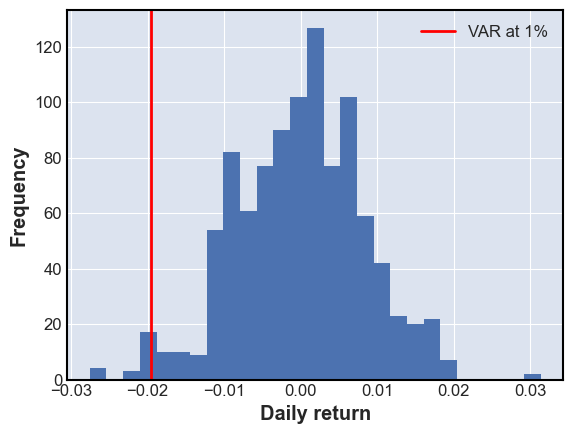

In [ ]:
from random import randint

nb_observation = daily_rets.size
target_obs = 1000
print('We currently have %d observations. We thus need to add %d more.' % (nb_observation, target_obs - nb_observation))


def augment_sample(daily_rets):
    extras = []
    for i in range(target_obs - nb_observation):
        extras.append(daily_rets[randint(1, nb_observation)])
    return pd.concat([daily_rets, pd.Series(extras)])


augmented_sample = augment_sample(daily_rets)

fig, ax = plt.subplots()
ax.hist(augmented_sample, bins='auto')
ax.set_xlabel('Daily return')
ax.set_ylabel('Frequency')

confidence_level = 0.01
var1 = norm.ppf(confidence_level, augmented_sample.mean(), augmented_sample.std())

ax.axvline(x=var1, color='r', label='VAR at 1%')
ax.legend()
print('After resampling, the VAR (daily) at 1%% is: %f or %f%%' % (var1, var1 * 100))

After conducting resampling analysis, we can infer that there is a 1% probability of experiencing negative returns of -2.00% or more. However, it is important to note that resampling does not reduce the variance of the sample or the Value at Risk (VAR) calculation. As a result, our VAR estimator may be subject to bias, and excessive use of resampling may lead to inaccurate estimates that deviate significantly from the actual value. Therefore, while resampling can be a useful tool in estimating VAR, it is crucial to exercise caution and consider potential sources of bias in the analysis.